**Risk Analysis Chatbot**


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

In [ ]:
# Import Dataset

dataset = pd.read_csv(r'https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset.csv')

In [ ]:
dataset.shape

(425, 11)

In [ ]:
dataset.head(5)

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

Lets us remove the First Column which has the index.

We can 'Label Encode' the Columns: 

1. Countries 
2. Local 
3. Industry Sector 
4. Accident Level 
5. Potential Level 
6. Gender 
7. Employee or Third Party

In [ ]:
dataset = dataset.iloc[:, 1:]
dataset

Data  ...                                        Description
0     1/1/2016 0:00  ...  While removing the drill rod of the Jumbo 08 f...
1     1/2/2016 0:00  ...  During the activation of a sodium sulphide pum...
2     1/6/2016 0:00  ...  In the sub-station MILPO located at level +170...
3     1/8/2016 0:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4    1/10/2016 0:00  ...  Approximately at 11:45 a.m. in circumstances t...
..              ...  ...                                                ...
420   7/4/2017 0:00  ...  Being approximately 5:00 a.m. approximately, w...
421   7/4/2017 0:00  ...  The collaborator moved from the infrastructure...
422   7/5/2017 0:00  ...  During the environmental monitoring activity i...
423   7/6/2017 0:00  ...  The Employee performed the activity of strippi...
424   7/9/2017 0:00  ...  At 10:00 a.m., when the assistant cleaned the ...

[425 rows x 10 columns]

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['Countries'] = label_encoder.fit_transform(dataset['Countries'])
dataset['Local'] = label_encoder.fit_transform(dataset['Local'])
dataset['Industry Sector'] = label_encoder.fit_transform(dataset['Industry Sector'])
dataset['Accident Level'] = label_encoder.fit_transform(dataset['Accident Level'])
dataset['Potential Accident Level'] = label_encoder.fit_transform(dataset['Potential Accident Level']) 
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])
dataset['Employee or Third Party'] = label_encoder.fit_transform(dataset['Employee or Third Party'])
dataset['Critical Risk'] = label_encoder.fit_transform(dataset['Critical Risk'])
dataset

Data  ...                                        Description
0     1/1/2016 0:00  ...  While removing the drill rod of the Jumbo 08 f...
1     1/2/2016 0:00  ...  During the activation of a sodium sulphide pum...
2     1/6/2016 0:00  ...  In the sub-station MILPO located at level +170...
3     1/8/2016 0:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4    1/10/2016 0:00  ...  Approximately at 11:45 a.m. in circumstances t...
..              ...  ...                                                ...
420   7/4/2017 0:00  ...  Being approximately 5:00 a.m. approximately, w...
421   7/4/2017 0:00  ...  The collaborator moved from the infrastructure...
422   7/5/2017 0:00  ...  During the environmental monitoring activity i...
423   7/6/2017 0:00  ...  The Employee performed the activity of strippi...
424   7/9/2017 0:00  ...  At 10:00 a.m., when the assistant cleaned the ...

[425 rows x 10 columns]

In [ ]:
dataset['Countries'].value_counts(sort = True)

0    251
1    130
2     44
Name: Countries, dtype: int64

In [ ]:
dataset['Local'].value_counts()

2     90
4     59
0     57
3     56
5     46
9     44
7     27
1     24
6     14
11     4
8      2
10     2
Name: Local, dtype: int64

In [ ]:
dataset['Industry Sector'].value_counts(sort = True)

1    241
0    134
2     50
Name: Industry Sector, dtype: int64

In [ ]:
dataset['Accident Level'].value_counts(sort = True)

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [ ]:
dataset['Potential Accident Level'].value_counts(sort = True)

3    143
2    106
1     95
0     49
4     31
5      1
Name: Potential Accident Level, dtype: int64

In [ ]:
dataset['Genre'].value_counts(sort = True)

1    403
0     22
Name: Genre, dtype: int64

In [ ]:
dataset['Employee or Third Party'].value_counts(sort = True)

1    189
0    179
2     57
Name: Employee or Third Party, dtype: int64

In [ ]:
# Check for Missing Values

dataset.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Removing the Date Column

dataset = dataset.iloc[:, 1:]

In [ ]:
# Rename Genre to Gender

dataset.rename(columns = {'Genre' : 'Gender'}, inplace = True)
dataset

Countries  ...                                        Description
0            0  ...  While removing the drill rod of the Jumbo 08 f...
1            1  ...  During the activation of a sodium sulphide pum...
2            0  ...  In the sub-station MILPO located at level +170...
3            0  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4            0  ...  Approximately at 11:45 a.m. in circumstances t...
..         ...  ...                                                ...
420          0  ...  Being approximately 5:00 a.m. approximately, w...
421          0  ...  The collaborator moved from the infrastructure...
422          1  ...  During the environmental monitoring activity i...
423          1  ...  The Employee performed the activity of strippi...
424          0  ...  At 10:00 a.m., when the assistant cleaned the ...

[425 rows x 9 columns]

In [ ]:
# Creating a Feature out of 'Accident Level' and 'Potential Accident Level' by combining them

dataset['Custom Accident Level'] = dataset['Accident Level'] + dataset['Potential Accident Level']
dataset = dataset.iloc[:, [0,1,2,5,6,7,8,9]]
dataset

Countries  ...  Custom Accident Level
0            0  ...                      3
1            1  ...                      3
2            0  ...                      2
3            0  ...                      0
4            0  ...                      6
..         ...  ...                    ...
420          0  ...                      2
421          0  ...                      1
422          1  ...                      1
423          1  ...                      1
424          0  ...                      1

[425 rows x 8 columns]

In [ ]:
# Target Variable is 'Custom Accident Level'

dataset_y = dataset['Custom Accident Level']
dataset_y.value_counts(sort = True)

2    96
3    94
1    88
0    49
5    29
4    29
6    23
7     9
8     7
9     1
Name: Custom Accident Level, dtype: int64

In [ ]:
# Independant Variables separation

dataset_x = dataset.iloc[:, :-1]
dataset_x

Countries  ...                                        Description
0            0  ...  While removing the drill rod of the Jumbo 08 f...
1            1  ...  During the activation of a sodium sulphide pum...
2            0  ...  In the sub-station MILPO located at level +170...
3            0  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4            0  ...  Approximately at 11:45 a.m. in circumstances t...
..         ...  ...                                                ...
420          0  ...  Being approximately 5:00 a.m. approximately, w...
421          0  ...  The collaborator moved from the infrastructure...
422          1  ...  During the environmental monitoring activity i...
423          1  ...  The Employee performed the activity of strippi...
424          0  ...  At 10:00 a.m., when the assistant cleaned the ...

[425 rows x 7 columns]

In [ ]:
# Split the data into Test and Train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(dataset_x, pd.DataFrame(dataset_y), train_size = 0.90, random_state = 12)
print(x_train.shape, y_train.shape)

(382, 7) (382, 1)


In [ ]:
x_train.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

**Pre-process the 'Description' feature from the 'Train' dataset**

In [ ]:
description = x_train['Description']
description

0      During the execution of the area cleaning acti...
1      Being 9:40 a.m. The driver of the AEQ-819 plat...
2      During the activity of chuteo of ore in hopper...
3      At 04:00 h on 05/19/17, the mechanic on duty o...
4      When removing the cap from the wear plate of t...
                             ...                        
377    As the employee cleaned the thermal recovery b...
378    The workers: César (injured) and Nilton receiv...
379    The maid was handling a pipette for sample pre...
380    The operator of the Scissor 187 leaves his equ...
381    the moment of extracting the bolts of the CHUC...
Name: Description, Length: 382, dtype: object

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import re

for i in range(len(description)):
   description[description.index[i]] = re.sub('[^a-zA-Z]',' ', description[description.index[i]]).lower()
   description[description.index[i]] = re.sub('\s+', ' ', description[description.index[i]])
   description[description.index[i]] = nltk.word_tokenize(description[description.index[i]])
   description[description.index[i]] = [WordNetLemmatizer().lemmatize(word) for word in description[description.index[i]] if word not in stopwords.words('english')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
!pip install nlpaug
!pip install transformers

import nlpaug.augmenter.word as naw

     |████████████████████████████████| 410 kB 4.1 MB/s 
     |████████████████████████████████| 3.5 MB 3.9 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 6.8 MB 30.4 MB/s 
     |████████████████████████████████| 895 kB 54.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


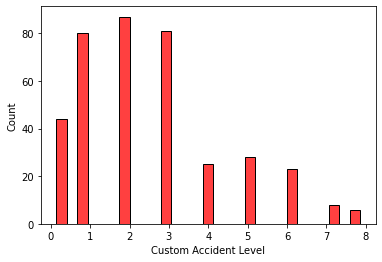

In [ ]:
import seaborn as sns

sns.histplot(y_train['Custom Accident Level'], shrink  = 0.5, color = 'red')

**From the above plot it is obvious that there is a 'Heavy Imbalance' in the dataset**

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

for i in range(len(description)):
   description[description.index[i]] = [TreebankWordDetokenizer().detokenize(description[description.index[i]])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
description

0      [execution area cleaning activity using hoe em...
1      [driver aeq plate dump truck ton heading loadi...
2      [activity chuteo ore hopper op operator locomo...
3      [h mechanic duty section antonio observed acti...
4      [removing cap wear plate warman lx bb pump lef...
                             ...                        
377    [employee cleaned thermal recovery boiler usin...
378    [worker c sar injured nilton receive order imm...
379    [maid handling pipette sample preparation chem...
380    [operator scissor leaf equipment parked level ...
381    [moment extracting bolt chuck rotation unit vs...
Name: Description, Length: 382, dtype: object

In [ ]:
description = list(description)
description

[['execution area cleaning activity using hoe employee hit fixed metal structure area coming reach abdomen left'],
 ['driver aeq plate dump truck ton heading loading area nv ob tj bp parking proceeding ore loading scoop ydrs moment lift first scoop towards hopper large bank fall causing tipper shake violently operator hit gear lever communicate supervisor evacuated medical center'],
 ['activity chuteo ore hopper op operator locomotive park equipment hopper fill first car moment blowing release load mud flow suddenly appears presence rock fragment personnel direction flow covered mud'],
 ['h mechanic duty section antonio observed activity withdrawal check pom moment impacted pulp line discharge stuck causing irritation right part neck ear mechanic referred medical center evaluation'],
 ['removing cap wear plate warman lx bb pump left hand employee glove slipped came contact cutting part board'],
 ['removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate cent

In [ ]:
import math
aug = naw.ContextualWordEmbsAug()

temp = y_train.groupby(['Custom Accident Level'])

for j in y_train['Custom Accident Level'].value_counts(sort = True).index.values:
  for x in temp.get_group(j).index.values:
    a = 100
    b = y_train['Custom Accident Level'].value_counts(sort = True)[j]
    c = a-b
    d = a%b
    e = a/b

    if b > c:
      for z in range(c):
        description.append(aug.augment(description[x], n = 1))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)

    elif c > b:
      for z in range(b):
        description.append(aug.augment(description[x], n = math.floor(e)))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)
      
    elif c == b:
      for z in range(b):
        description.append(aug.augment(description[x], n = 1))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)

**Let us save the Augmented and Balanced Dataset for future use**

In [ ]:
description_augmented = pd.DataFrame(description, columns = ['Description'])
description_augmented.to_csv('description_augmented.csv')

In [ ]:
dataset_chatbot = pd.concat([description_augmented, y_train], axis = 1)
dataset_chatbot.to_csv('dataset_chatbot.csv')
dataset_chatbot.head(5)

Description  Custom Accident Level
0  execution area cleaning activity using hoe emp...                      2
1  driver aeq plate dump truck ton heading loadin...                      6
2  activity chuteo ore hopper op operator locomot...                      3
3  h mechanic duty section antonio observed activ...                      1
4  removing cap wear plate warman lx bb pump left...                      1

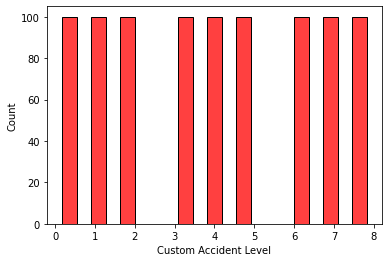

In [ ]:
import seaborn as sns

sns.histplot(dataset_chatbot['Custom Accident Level'], shrink  = 0.5, color = 'red')

**Making a Balanced Dataset to feed into Machine Learning Models**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 12)

x_train_ml, y_train_ml = smote.fit_resample(x_train.iloc[:, :-1], y_train)

In [ ]:
print(x_train_ml.shape, y_train_ml.shape)

(783, 6) (783, 1)


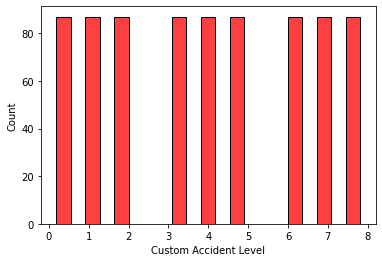

In [ ]:
import seaborn as sns

sns.histplot(y_train_ml['Custom Accident Level'], shrink  = 0.5, color = 'red')

**x_train_ml** and **y_train_ml** can be used in **Machine Learning Models**

**dataset_chatbot** can be used in **RNN/LSTM Classifier** 

**dataset_chatbot** has its **Stop Words Removed**, **Lemmatized**

**Contextual Word Embedding Augmentation (ContextualWordEmbsAug)** is used in **dataset_chatbot** for handling **Imbalanced Dataset** 

In [ ]:
dataset_chatbot

Description  Custom Accident Level
0    execution area cleaning activity using hoe emp...                      2
1    driver aeq plate dump truck ton heading loadin...                      6
2    activity chuteo ore hopper op operator locomot...                      3
3    h mechanic duty section antonio observed activ...                      1
4    removing cap wear plate warman lx bb pump left...                      1
..                                                 ...                    ...
895  approximately from circumstance of launched of...                      8
896  access level installation wall grade lining pi...                      8
897  access bridge installation activity hydraulic ...                      8
898  one level structure activity station service p...                      8
899  access level installation activity hydraulic f...                      8

[900 rows x 2 columns]

We will create another dataset without processing such as stemming and lemmatization, which could be used even in NLP models such as BERT.
We will use the following Augmentation Techniques:

1. Contextual Word Embedding Augmentation (ContextualWordEmbsAug)
2. Synonym Augmentation (SynonymAug)
3. Random word augmentation (RandomWordAug)

Since the aim is to build NLP based chatbot as described in the report, we drop all columns except the **Description** and the **Target Variable (Accident Level)**

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns

In [3]:
# Import Dataset

dataset = pd.read_csv(r'https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset.csv')

In [4]:
dataset['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [5]:
dataset_final = dataset.iloc[:, [5, -1]]
dataset_final.head(5)

Accident Level                                        Description
0              I  While removing the drill rod of the Jumbo 08 f...
1              I  During the activation of a sodium sulphide pum...
2              I  In the sub-station MILPO located at level +170...
3              I  Being 9:45 am. approximately in the Nv. 1880 C...
4             IV  Approximately at 11:45 a.m. in circumstances t...

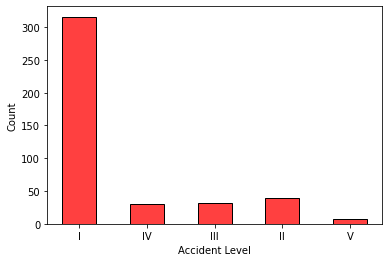

In [6]:
sns.histplot(x = dataset_final['Accident Level'], color = 'red', shrink = 0.50)

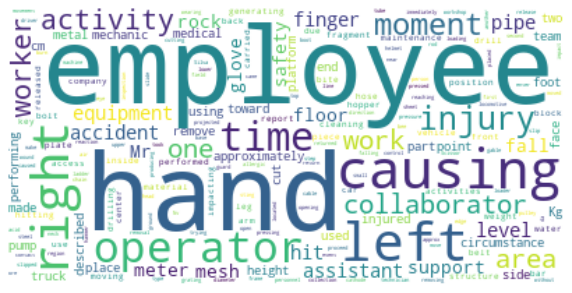

In [7]:
#Visualization of all words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final.Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset_final['Accident Level'] = label_encoder.fit_transform(dataset_final['Accident Level'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
dataset_final['Accident Level'].value_counts()

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

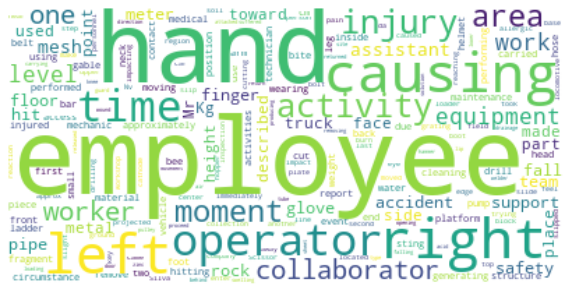

In [10]:
# Accident Level 1
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final[dataset_final['Accident Level']==0].Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

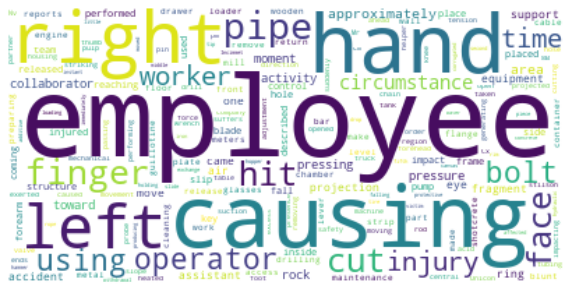

In [11]:
# Accident Level 2
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final[dataset_final['Accident Level']==1].Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

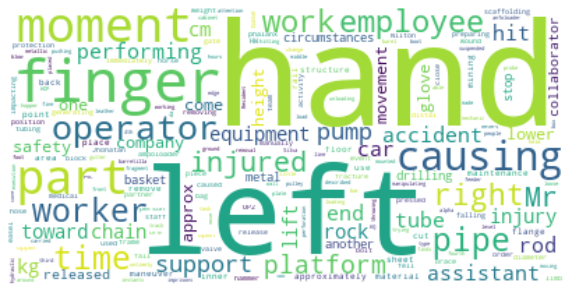

In [13]:
# Accident Level 3
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final[dataset_final['Accident Level']==2].Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

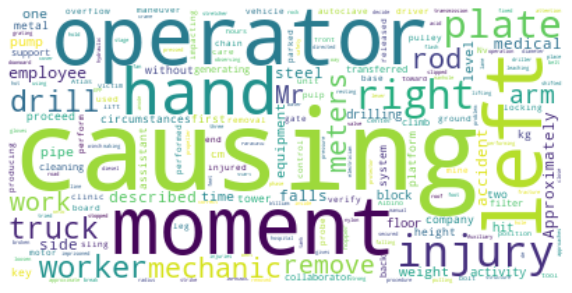

In [14]:
# Accident Level 4
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final[dataset_final['Accident Level']==3].Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

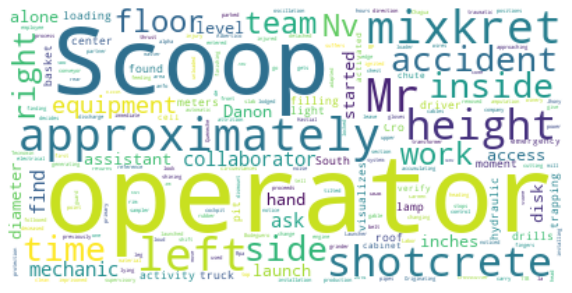

In [15]:
# Accident Level 5
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(line for line in dataset_final[dataset_final['Accident Level']==4].Description))
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Split the data into Test and Train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(pd.DataFrame(dataset_final['Description'], columns = ['Description']), pd.DataFrame(dataset_final['Accident Level'], columns = ['Accident Level']), train_size = 0.90, stratify = pd.DataFrame(dataset_final['Accident Level']), random_state = 12)

In [17]:
x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [18]:
y_train.value_counts()

Accident Level
0                 284
1                  36
2                  28
3                  27
4                   7
dtype: int64

In [19]:
y_test.value_counts()

Accident Level
0                 32
1                  4
2                  3
3                  3
4                  1
dtype: int64

Let us combine **Accident Level 4 and 5** as a single class

In [20]:
y_train.replace(4, 3, inplace = True)
y_test.replace(4, 3, inplace = True)

Let us Balance the dataset!

In [21]:
!pip install nlpaug 
!pip install transformers

import nltk
import nlpaug.augmenter.word as naw
import nlpaug.flow as naf

nltk.download('popular')
from nltk.corpus import stopwords

     |████████████████████████████████| 410 kB 5.2 MB/s 
     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 67 kB 3.3 MB/s 
     |████████████████████████████████| 6.5 MB 36.8 MB/s 
     |████████████████████████████████| 596 kB 33.0 MB/s 
     |████████████████████████████████| 895 kB 45.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |  

In [22]:
Description = list(x_train['Description'])

In [23]:
import re
import math

for i in range(len(Description)):
  Description[i] = Description[i].lower()
  Description[i] = re.sub('[^a-z]', ' ', Description[i])
  Description[i] = Description[i].split()
  Description[i] = ' '.join(Description[i])

In [24]:
Description

['at level access scissor performed the sustaining activity drilling the drill to install the split when lifting the electrowelded mesh of square meters m x m weight kg approximately to the team s platform the assistant slips and feels a pain in the inner edge of the right knee',
 'in general store while two store attendants removed the compartment a rubber mesh for material classification m x m x m kg of weight when lifted approx cm to position it against the edge of another mesh placed on the floor on a litter this slightly imprisons the index finger of the right hand of one of the assistants causing a minor cutting wound at the time of the accident the injured worker used leather gloves',
 'being p m approximately in the nv in the tecnomin winery mr chagua bodeguero was alone cutting wires no with a grinder previously he had removed the protection guard from the disk of inches in diameter and adapted a disk of a crosscutter of approximately inches originating traumatic amputation of

In [25]:
print(len(Description), type(Description))

382 <class 'list'>


In [ ]:
aug  = naf.Sometimes([naw.ContextualWordEmbsAug(action  = 'substitute', aug_min = 2, aug_max = 4, stopwords = stopwords.words('english')),
                      naw.ContextualWordEmbsAug(action  = 'insert', aug_min = 2, aug_max = 4, stopwords = stopwords.words('english')),
                      naw.SynonymAug(aug_min = 2, aug_max = 4, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'substitute', aug_min = 2, aug_max = 3, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'swap', aug_min = 2, aug_max = 3, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'delete', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english'))])

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
len(Description)

382

In [ ]:
temp = y_train.groupby(['Accident Level'])

for j in y_train['Accident Level'].value_counts(sort = True).index.values:
    a = 300
    b = y_train['Accident Level'].value_counts(sort = True)[j]
    c = a-b
    d = a%b
    e = a/b

    if b > c:
      for x in temp.get_group(j).index.values[0:c]:
        print(j, x, len(Description))
        Description.append(aug.augment(Description[x], n = 1))
        y_train = y_train.append({'Accident Level' : j}, ignore_index = True)

    elif c > b:
      for x in temp.get_group(j).index.values:
        print(j, x, len(Description))
        for i in range (0, math.floor(e)):
          Description.append(aug.augment(Description[x], n = 1))
          y_train = y_train.append({'Accident Level' : j}, ignore_index = True)
      
    elif c == b:
      for x in temp.get_group(j).index.values:
        print(j, x, len(Description))
        Description.append(aug.augment(Description[x], n = 1))
        y_train = y_train.append({'Accident Level' : j}, ignore_index = True)

0 0 382
0 1 383
0 3 384
0 5 385
0 6 386
0 7 387
0 8 388
0 10 389
0 11 390
0 12 391
0 13 392
0 14 393
0 15 394
0 16 395
0 19 396
0 20 397
1 4 398
1 31 406
1 36 414
1 41 422
1 51 430
1 56 438
1 66 446
1 84 454
1 86 462
1 106 470
1 113 478
1 115 486
1 136 494
1 180 502
1 181 510
1 189 518
1 231 526
1 248 534
1 255 542
1 269 550
1 277 558
1 279 566
1 298 574
1 309 582
1 313 590
1 320 598
1 321 606
1 328 614
1 330 622
1 342 630
1 346 638
1 351 646
1 360 654
1 361 662
1 365 670
1 371 678
3 2 686
3 9 694
3 46 702
3 58 710
3 65 718
3 90 726
3 91 734
3 112 742
3 121 750
3 129 758
3 130 766
3 132 774
3 140 782
3 150 790
3 151 798
3 171 806
3 172 814
3 182 822
3 185 830
3 210 838
3 211 846
3 227 854
3 234 862
3 264 870
3 266 878
3 285 886
3 294 894
3 299 902
3 303 910
3 307 918
3 319 926
3 332 934
3 335 942
3 352 950
2 17 958
2 18 968
2 22 978
2 26 988
2 32 998
2 38 1008
2 44 1018
2 53 1028
2 77 1038
2 92 1048
2 104 1058
2 116 1068
2 117 1078
2 139 1088
2 170 1098
2 188 1108
2 213 1118
2 216 1128

In [ ]:
y_train.value_counts()

In [ ]:
import re

for i in range(len(Description)):
  Description[i] = Description[i].lower()
  Description[i] = re.sub('[^a-z]', ' ', Description[i])
  Description[i] = Description[i].split()
  Description[i] = ' '.join(Description[i])

In [ ]:
Description

['at level access scissor performed the sustaining activity drilling the drill to install the split when lifting the electrowelded mesh of square meters m x m weight kg approximately to the team s platform the assistant slips and feels a pain in the inner edge of the right knee',
 'in general store while two store attendants removed the compartment a rubber mesh for material classification m x m x m kg of weight when lifted approx cm to position it against the edge of another mesh placed on the floor on a litter this slightly imprisons the index finger of the right hand of one of the assistants causing a minor cutting wound at the time of the accident the injured worker used leather gloves',
 'being p m approximately in the nv in the tecnomin winery mr chagua bodeguero was alone cutting wires no with a grinder previously he had removed the protection guard from the disk of inches in diameter and adapted a disk of a crosscutter of approximately inches originating traumatic amputation of

In [ ]:
description_augmented = pd.DataFrame(Description, columns = ['Description'])

dataset_augmented = pd.concat([description_augmented, y_train], axis = 1)
dataset_augmented.to_csv('dataset_augmented.csv')
dataset_augmented.head(5)

**The Dataset is now balanced and Augmented**

**"dataset_augmented" will be used for all further embeddings and input to models.**

In [26]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import tokenize,stem
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as acc_score
import lightgbm as lgbm
import gensim
from gensim.models import word2vec
from nltk.tokenize import RegexpTokenizer
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
dataset_augmented = pd.read_csv('https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset_augmented.csv')
dataset_augmented = dataset_augmented.iloc[:, [1, 2]]

In [28]:
for sentence in dataset_augmented['Description'][:5]:
  print(sentence,'\n')

at level access scissor performed the sustaining activity drilling the drill to install the split when lifting the electrowelded mesh of square meters m x m weight kg approximately to the team s platform the assistant slips and feels a pain in the inner edge of the right knee 

in general store while two store attendants removed the compartment a rubber mesh for material classification m x m x m kg of weight when lifted approx cm to position it against the edge of another mesh placed on the floor on a litter this slightly imprisons the index finger of the right hand of one of the assistants causing a minor cutting wound at the time of the accident the injured worker used leather gloves 

being p m approximately in the nv in the tecnomin winery mr chagua bodeguero was alone cutting wires no with a grinder previously he had removed the protection guard from the disk of inches in diameter and adapted a disk of a crosscutter of approximately inches originating traumatic amputation of two f

In [29]:
def sent_to_word(sent):
    
    words = RegexpTokenizer('\w+').tokenize(sent)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [70]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!rm glove.6B.zip glove.6B.50d.txt glove.6B.100d.txt  glove.6B.200d.txt

######
# Comment this once file is downloaded and pushed to git location #
######

--2022-03-27 16:05:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-27 16:05:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-27 16:05:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [30]:
all_words = list()
for sent in dataset_augmented.Description:
    for w in sent_to_word(sent):
        all_words.append(w)

In [ ]:
embeddings_index

{'the': array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-0

In [32]:
embeddings_index = {}
f = open('glove.6B.300d.txt') # GLOBAL VECTOR
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [35]:
def glove_pipeline(data):

  data_list = list()
  for sent in data:
    sentence = np.zeros(300)
    count = 0
    for w in sent_to_word(sent):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)
  return data_list

In [ ]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 4642


In [36]:
data_list=np.array(glove_pipeline(dataset_augmented.Description))

In [37]:
data_list[:5]

array([[-0.05403613,  0.1564435 , -0.08857549, ..., -0.10539716,
        -0.00160709, -0.00129561],
       [-0.09891836,  0.14997488, -0.05550787, ..., -0.12456259,
        -0.05059317, -0.02474556],
       [-0.17769064,  0.07592212, -0.0516288 , ..., -0.11707112,
        -0.04874599, -0.04248702],
       [-0.07699847,  0.14825249,  0.02245492, ..., -0.16208855,
        -0.04238818,  0.02170765],
       [ 0.00875827,  0.11781082, -0.03100735, ..., -0.1043348 ,
        -0.18481218,  0.02987187]])

In [38]:
data_list.shape

(1238, 300)

In [39]:
test_data=np.array(glove_pipeline(x_test['Description']))
test_data[:5]

array([[ 0.10259133,  0.16811075, -0.1086419 , ..., -0.18358768,
        -0.15504125,  0.01377229],
       [-0.10114831,  0.0776246 , -0.02692962, ..., -0.13939755,
        -0.01249442, -0.02478652],
       [-0.13300446,  0.14304105, -0.02236985, ..., -0.09430624,
        -0.0978192 , -0.06290451],
       [-0.11565578,  0.07694524, -0.05005856, ..., -0.10927741,
        -0.05666621,  0.00041589],
       [-0.1549964 ,  0.10484437, -0.05735047, ..., -0.12684942,
        -0.02768121, -0.04032986]])

In [40]:
test_data.shape 

(43, 300)

In [41]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(data_list, dataset_augmented['Accident Level'])
pred = clf.predict(data_list)
print('Naive Bayes: \nTraining accuracy',accuracy_score(dataset_augmented['Accident Level'], pred))
pred_test=clf.predict(test_data)
print('Naive Bayes: \nTest accuracy',accuracy_score(y_test, pred_test))

Naive Bayes: 
Training accuracy 0.6365105008077544
Naive Bayes: 
Test accuracy 0.5581395348837209


In [44]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(data_list, dataset_augmented['Accident Level'])
pred = model_RF.predict(data_list)
print('Random Forest: \nTraining accuracy',accuracy_score(dataset_augmented['Accident Level'], pred))
pred_test=model_RF.predict(test_data)
print('Random Forest: \nTest accuracy',accuracy_score(y_test, pred_test))

Random Forest: 
Training accuracy 0.9983844911147012
Random Forest: 
Test accuracy 0.6744186046511628


In [47]:
import xgboost as xgb
model_XGB = xgb.XGBClassifier()
model_XGB.fit(data_list, dataset_augmented['Accident Level'])
pred = model_XGB.predict(data_list)
print('XGB Classifier: \nTraining accuracy', accuracy_score(dataset_augmented['Accident Level'], pred))
pred_test=model_XGB.predict(test_data)
print('XGB Classifier: \nTest accuracy',accuracy_score(y_test, pred_test))

XGB Classifier: 
Training accuracy 0.9983844911147012
XGB Classifier: 
Test accuracy 0.6046511627906976


In [48]:
from sklearn.svm import SVC
model_SVM = SVC(kernel = 'linear')
model_SVM.fit(data_list, dataset_augmented['Accident Level'])
pred = model_SVM.predict(data_list)
print('Support Vector Machine: \nTraining accuracy', accuracy_score(dataset_augmented['Accident Level'], pred))
pred_test=model_SVM.predict(test_data)
print('Support Vector Machine: \nTest accuracy',accuracy_score(y_test, pred_test))

Support Vector Machine: 
Training accuracy 0.8852988691437803
Support Vector Machine: 
Test accuracy 0.5813953488372093


###BERT

In [ ]:
# # BERT

# import tensorflow as tf
# import tensorflow_hub as hub
# # !pip install tensorflow_text
# import tensorflow_text as text

# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# def get_sentence_embeding(sentences):
#     preprocessed_text = bert_preprocess(sentences)
#     return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # NN layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)

In [ ]:
# x_train=dataset_augmented.Description
# y_train=dataset_augmented['Accident Level']

In [ ]:
# #Train
# model.fit(x_train, y_train, epochs=5)

Epoch 1/5
39/39 [==============================] - 550s 14s/step - loss: -3.5445 - accuracy: 0.2625 - precision: 0.7583 - recall: 1.0000
Epoch 2/5
39/39 [==============================] - 534s 14s/step - loss: -8.6114 - accuracy: 0.2625 - precision: 0.7583 - recall: 1.0000
Epoch 3/5
39/39 [==============================] - 544s 14s/step - loss: -13.7956 - accuracy: 0.2625 - precision: 0.7583 - recall: 1.0000
Epoch 4/5
39/39 [==============================] - 545s 14s/step - loss: -19.0168 - accuracy: 0.2625 - precision: 0.7581 - recall: 0.9989
Epoch 5/5
39/39 [==============================] - 546s 14s/step - loss: -24.1740 - accuracy: 0.2625 - precision: 0.7581 - recall: 0.9989


In [ ]:
# model.evaluate(x_test, y_test)

2/2 [==============================] - 21s 5s/step - loss: 28.8499 - accuracy: 0.0930 - precision: 0.2558 - recall: 1.0000


[28.849876403808594, 0.09302325546741486, 0.25581395626068115, 1.0]

In [ ]:
# y_pred = model.predict(x_test)
# y_pred = y_pred.flatten()

In [ ]:
# for i in range(len(y_pred)):
#   if y_pred[i]<=0.25:
#     y_pred[i]=0
#   elif y_pred[i]<=0.5:
#     y_pred[i]=1
#   elif y_pred[i]<=0.75:
#     y_pred[i]=2
#   else:
#     y_pred[i]=3

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report

# cm = confusion_matrix(y_test, y_pred)
# cm 

array([[ 0,  0,  0, 32],
       [ 0,  0,  0,  4],
       [ 0,  0,  0,  3],
       [ 0,  0,  0,  4]])

In [ ]:
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.09      1.00      0.17         4

    accuracy                           0.09        43
   macro avg       0.02      0.25      0.04        43
weighted avg       0.01      0.09      0.02        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##DistilBert

In [49]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 1.7 MB 47.9 MB/s 
     |████████████████████████████████| 1.2 MB 43.7 MB/s 
     |████████████████████████████████| 325 kB 60.0 MB/s 
     |████████████████████████████████| 10.1 MB 25.5 MB/s 
     |████████████████████████████████| 181 kB 41.6 MB/s 
     |████████████████████████████████| 144 kB 59.5 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 212 kB 41.2 MB/s 
     |████████████████████████████████| 134 kB 65.0 MB/s 
     |████████████████████████████████| 1.1 MB 34.9 MB/s 
     |████████████████████████████████| 127 kB 44.2 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 41.2 MB/s 
     |████████████████████████████████| 144 kB 49.3 MB/s 
     |████████████████████████████████| 111 kB 53.6 MB/s 
     |██████████████

In [50]:
from simpletransformers.classification import ClassificationModel

In [ ]:
model_type = 'distilbert'
model_name = 'distilbert-base-cased'


train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,

    # size
    "train_batch_size": 128, # 
    "max_seq_length": 128, # use small value to avoid OOM
    "num_train_epochs": 15,

    # evaluation
    "evaluate_during_training": False,
    "evaluate_during_training_steps": 1000,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "eval_batch_size": 64,
    "gradient_accumulation_steps": 1,
}

In [ ]:
model_distilbert = ClassificationModel(model_type, model_name, args=train_args,num_labels=4, use_cuda=False,)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier

In [ ]:
model_distilbert.train_model(dataset_augmented)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1238 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/10 [00:00<?, ?it/s]

(150, 0.29934823998870946)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_test=pd.concat([x_test,pd.Series(y_test)],axis=1)

In [ ]:
result_distilbert, model_outputs_distilbert, wrong_predictions_distilbert = model_distilbert.eval_model(df_test, acc = acc_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/43 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
result_distilbert

{'mcc': 0.19364916731037085,
 'acc': 0.7441860465116279,
 'eval_loss': 1.3358466625213623}

In [ ]:
model_outputs_distilbert

array([[ 3.24946976, -0.0265007 , -2.20781994,  0.26374266],
       [ 5.12538147, -1.16652107, -1.46179116, -1.05564964],
       [ 5.04607677, -1.12376189, -1.2467947 , -1.21402764],
       [ 5.10964966, -1.16238284, -1.39277399, -1.10665643],
       [ 4.98843098, -0.41078293, -1.40100801, -1.72569597],
       [ 4.53298426,  0.37102786, -1.52210188, -1.99989152],
       [ 5.13436031, -0.93284529, -1.41555536, -1.41134453],
       [ 2.8160708 ,  2.68387461, -1.87232876, -2.15224409],
       [ 5.1231308 , -1.16264129, -1.37213302, -1.07346082],
       [ 0.95280486,  1.98079395,  0.02998593, -2.2730794 ],
       [ 4.83478546, -0.71334398, -1.34730029, -1.36802459],
       [ 5.05122375, -0.46625283, -1.51984811, -1.55764949],
       [ 0.77828902,  2.26312065, -0.90323097, -1.29841208],
       [ 2.49955416, -1.17904103, -2.08019304,  1.71343362],
       [ 5.15280724, -0.97582793, -1.57535148, -0.98105878],
       [ 3.21280956,  1.80099702, -1.97339916, -1.6002959 ],
       [-0.30068442,  4.

In [ ]:
wrong_predictions_distilbert

[{'guid': 12, 'text_a': 'In circumstances that the assistant of mine was arranging to advance the hose of flexible nylon of 1 "of diameter, to proceed with the watered of shot fired, positioning itself under a zone with the support deteriorated by the last blasting, moment in which it gives off a block of rock (25cmx10cmx5cm; 3.5 Kg) of the roof of the work of a height of 5.2 meters which when falling hits by rebound in the left leg of the collaborator causing the described injury.', 'text_b': None, 'label': 3},
 {'guid': 16, 'text_a': 'During the die cutting of the feeder (PEAD geomembrane blanket weld seam) to store the extruder, the stylet blade came in the direction of its left forearm, resulting in blunt short injury.', 'text_b': None, 'label': 0},
 {'guid': 22, 'text_a': 'Being approximately 8:10 p.m. Alpha operator Mr. Ronald was heading to mine when he decides to stop the equipment to accommodate the lights (left side), manipulating the support of the lighthouse, catching his f

In [ ]:
model_distilbert.save_model(output_dir='/content/drive/MyDrive/Colab_Notebooks/Capstone/Model')

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/Capstone/Model

In [ ]:
##Model does not get saved, hence Random Forest Classifier is selected for final Chatbot

##Chatbot

In [51]:
import pickle
model = open("model_RF.pkl","wb")
pickle.dump(model_RF, model)
model.close()

In [52]:
pickledmodel = open('model_RF.pkl',"rb")

In [57]:
!pip install streamlit

In [58]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip  
!unzip -qq ngrok-stable-linux-amd64.zip

--2022-03-27 14:42:18--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  35.8MB/s    in 0.4s    

2022-03-27 14:42:19 (35.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [75]:
%%writefile risk.py

import numpy as np
import pickle
import pandas as pd
import streamlit as st
from PIL import Image
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer

def sent_to_word(sent):
    
    words = RegexpTokenizer('\w+').tokenize(sent)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    return words

pickledmodel = open('model_RF.pkl',"rb")
nlp_classifier = pickle.load(pickledmodel)

#model_XGB = xgboost.Booster()
#model_XGB.load_model('model_XGB.JSON')


def model_pipeline(problem):
  embeddings = {}

  f = open('glove.6B.300d.txt', 'r', encoding = 'utf-8')

  for line in f:
    values = line.split()
    words = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings[words] = coefs
  f.close()

  data_list = list()
  sentence = np.zeros(300)
  count = 0
  dataset_word = sent_to_word(problem)
  for x in dataset_word:
       try:
           sentence += embeddings[x]
           count += 1
       except KeyError:
           continue
  data_list.append(sentence / count)

  return  model_RF.predict(np.array(data_list))



def main():
    st.title("Risk Analysis Chatbot")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;"> Risk Analysis Chatbot </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    problem = st.text_input("Problem","Type Here")

    result=""

    if st.button("Predict"):
        result = model_pipeline(problem)
    st.success('The output is {}'.format(result))

if __name__=='__main__':
    main()

Overwriting risk.py


In [65]:
!streamlit run risk.py

2022-03-27 14:52:13.973 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.202.28.162:8501

  Stopping...


In [64]:
#you may have to run this cell again if it throws an erro
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])" 
    
# this gives you the link on which your web app will be deployed

http://99ec-35-202-28-162.ngrok.io
